# Introduction

**The notebook include:**
1. Library and Functions
2. Data cleaning
3. Data aggragation
4. Feature engineering along the way
5. Model pipeline

# Import library

In [1]:
import pandas as pd
import numpy as np

In [2]:
## Shpae and geometry
from shapely.geometry import Point
# import shapefile as shp
# import pyshp as shp

In [3]:
## Request and Json
import requests
import json
from pandas.io.json import json_normalize
from requests_futures.sessions import FuturesSession

In [4]:
## datatime
import datetime as dt
# from pytz import timezone

In [345]:
## intervative plotting
import matplotlib.pyplot as plt
import seaborn as sns

import altair as alt
alt.renderers.enable('notebook')
import folium

In [6]:
## geopandas
import sys
!{sys.executable} -m pip install geopandas
import geopandas as gpd

In [748]:
# import gc
gc.collect()

4072

# Functions

In [9]:
## function to create point from lat long
def point_trans(x):
    return Point(x[0],x[1])

In [129]:
def manhattan_zip(x):    
    m_zip = [10286,10276,10268,10256,10249,10159,10150,10116,10113,10108,10101,10008,10282,10281,10280,10279,10278,
         10271,10270,10199,10178,10177,10176,10175,10174,10173,10172,10171,10170,10169,10168,10167,10166,10165,
         10162,10161,10158,10155,10154,10153,10152,10151,10128,10123,10122,10121,10120,10119,10118,10115,10112,
         10111,10110,10107,10106,10105,10104,10103,10099,10098,10095,10090,10069,10060,10055,10048,10045,10044,
         10041,10040,10039,10038,10037,10036,10035,10034,10033,10032,10031,10030,10029,10028,10027,10026,10025,
         10024,10023,10022,10021,10020,10019,10018,10017,10016,10015,10014,10013,10012,10011,10010,10009,10007,
         10006,10005,10003,10002,10001,10065,10075,10004]
    if x in m_zip:
        return 1
    else:
        return 0

def brooklyn_zip(x):
    brooklyn_zip = [11256,11252,11249,11243,11242,11241,11239,11238,11237,11236,11235,11234,11233,11232,11231,
                    11230,11229,11228,11226,11225,11224,11223,11222,11221,11220,11219,11218,11217,11216,11215,
                    11214,11213,11212,11211,11210,11209,11208,11207,11206,11205,11204,11203,11201]
    if x in brooklyn_zip:
        return 1
    else:
        return 0
def queens_zip(x):
    queens_zip = [11436,11435,11434,11433,11432,11429,11428,11427,11426,
                  11423,11422,11421,11420,11419,11418,11417,11416,11415,11414,11413,11412,11411,11385,11379,
                  11378,11377,11375,11374,11373,11372,11369,11368,11367,11366,11365,11364,11363,
                  11362,11361,11360,11359,11358,11357,11356,11355,11354,11351,11109,11106,11105,11104,11103,
                  11102,11101,11004]
    if x in queens_zip:
        return 1
    else:
        return 0
    ### two airport:11430,11371,the islands:11370,11697,11694,11693,11692,11691, are not fully covered by the check-in data

In [781]:
def valid_zip(x):
    m_zip = [83,10286,10276,10268,10256,10249,10159,10150,10116,10113,10108,10101,10008,10282,10281,10280,10279,10278,10275,
         10271,10270,10199,10178,10177,10176,10175,10174,10173,10172,10171,10170,10169,10168,10167,10166,10165,
         10162,10161,10158,10155,10154,10153,10152,10151,10128,10123,10122,10121,10120,10119,10118,10115,10112,
         10111,10110,10107,10106,10105,10104,10103,10099,10098,10095,10090,10069,10060,10055,10048,10047,10045,10044,
         10041,10040,10039,10038,10037,10036,10035,10034,10033,10032,10031,10030,10029,10028,10027,10026,10025,
         10024,10023,10022,10021,10020,10019,10018,10017,10016,10015,10014,10013,10012,10011,10010,10009,10007,
         10006,10005,10004,10003,10002,10001,10065,10075,10080,
             10285,10203,10178,10017,10178,10168,10167,10177,# supplementary
             10175,10166,10171,10176,10174,10165,10170,10173,10169,10172,10019, 10105, 10097, 10104, 10107, 10103, 10106,
           10022, 10055, 10155, 10152, 10153, 10151, 10154, 10001, 10120, 10119, 10118, 10123, 10122, 10121,
             10005, 10081, 10286, 10260, 10271, 10259, 10043, 10270, 10265, 10203,10036, 10096, 10196, 10110,
            ]
    brooklyn_zip = [11256,11252,11249,11243,11242,11241,11239,11238,11237,11236,11235,11234,11233,11232,11231,
                    11230,11229,11228,11226,11225,11224,11223,11222,11221,11220,11219,11218,11217,11216,11215,
                    11214,11213,11212,11211,11210,11209,11208,11207,11206,11205,11204,11203,11201]
    queens_zip = [11451,11436,11435,11434,11433,11432,11429,11428,11427,11426,
                  11423,11422,11421,11420,11419,11418,11417,11416,11415,11414,11413,11412,11411,11385,11379,
                  11378,11377,11375,11374,11373,11372,11369,11368,11367,11366,11365,11364,11363,
                  11362,11361,11360,11359,11358,11357,11356,11355,11354,11351,11109,11106,11105,11104,11103,
                  11102,11101,11004]
    if x in (m_zip + brooklyn_zip + queens_zip):
        return 1
    else:
        return 0
    

In [754]:
def point_in_zip(x):
    point = Point(x[0],x[1])
    y = None
    for ind,val in enumerate(gpd_zip['geometry']):
        if point.within(val):
            y = int(gpd_zip['ZIPCODE'].iloc[ind])
    return y
#     else: return 'Location out of prediction range!'

In [423]:
## change the ziprow to the first item in the overlap zip list
def recombine_zip(x):
#     overlap_zip = dill.load(open('overlap_zip.dill', 'rb'))
    overlap_zip = {10118: 10001, 10119: 10001, 10120: 10001, 10121: 10001, 10122: 10001, 10123: 10001, 10041: 10004, 10275: 10004,
                   10043: 10005, 10081: 10005, 10203: 10005, 10259: 10005, 10260: 10005, 10265: 10005, 10270: 10005, 10271: 10005,
                   10286: 10005, 10278: 10007, 10279: 10007, 10047: 10010, 10158: 10016, 10165: 10017, 10166: 10017, 10167: 10017,
                   10168: 10017, 10169: 10017, 10170: 10017, 10171: 10017, 10172: 10017, 10173: 10017, 10174: 10017, 10175: 10017,
                   10176: 10017, 10177: 10017, 10178: 10017, 10097: 10019, 10103: 10019, 10104: 10019, 10105: 10019, 10106: 10019,
                   10107: 10019, 10111: 10019, 10020: 10019, 10112: 10019, 10162: 10021, 10055: 10022, 10151: 10022, 10152: 10022,
                   10153: 10022, 10154: 10022, 10155: 10022, 10096: 10036, 10110: 10036, 10196: 10036, 10045: 10038, 10080: 10048,
                   10285: 10281, 10069: 10023, 11451: 11433, 10115: 10027, 11109:11101,}
     
    if x in overlap_zip.keys():
        return overlap_zip[x]
    if x in overlap_zip.values():
        return x
    else:
        return x

In [424]:
dill.dump(overlap_zip, open('overlap_zip.dill', 'wb'))

# Read and write data

**NYC check-ins**

In [ ]:
## raw check-in data
nyc_checkin = pd.read_csv('dataset_TSMC2014_NYC.csv')

In [ ]:
## cleaned check-in data
nyc_checkin_upd = pd.read_csv('nyc_checkin_upd_0725.csv')

In [ ]:
nyc_checkin_upd.datetime.min(),nyc_checkin_upd.datetime.max()

In [ ]:
nyc_checkin.to_csv('nyc_checkin_full_0725.csv')
nyc_checkin_upd.to_csv('nyc_checkin_upd_0725.csv')

**Zipcode geo-shapes**

In [782]:
## zipocde shape
gpd_zip = gpd.read_file('/home/jovyan/capstone_project/zip_area/ZIP_CODE_040114.shp').to_crs(epsg=4326)
len(gpd_zip)

263

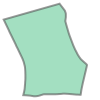

In [783]:
gpd_zip.geometry[0]

In [784]:
gpd_zip['valid']=gpd_zip['ZIPCODE'].apply(lambda x: valid_zip(int(x)))

In [785]:
gpd_zip['valid'].sum()

205

In [786]:
dill.dump(gpd_zip, open('gpd_zip.dill', 'wb'))

**Check-in aggregations**

In [ ]:
## complied check-in aggregate data
checkin_aggre=pd.read_csv('checkin_aggre_0717.csv')
checkin_aggre.drop('Unnamed: 0',axis=1,inplace=True)

**Venus density data**

In [ ]:
venus_density = pd.read_csv('venus_density_0728.csv')

In [ ]:
venus_density.to_csv('venus_density_0728.csv')

** weather data **

In [ ]:
wea_data = pd.read_csv('weather_data.csv')

**Trip aggregation data**

In [ ]:
trip_aggre = pd.read_csv('trip_aggre_all_0728.csv')

**Cleaned Training data**

In [15]:
checkin_trip = pd.read_csv('checkin_trip_0814.csv')
checkin_trip.drop('Unnamed: 0',axis=1,inplace=True)

In [63]:
checkin_trip.to_csv('checkin_trip_0814.csv')

# Check-in Data cleanning

In [ ]:
## remove null value
nyc_checkin = nyc_checkin[nyc_checkin['longitude'].notnull()]

In [ ]:
## Convert timestamp to datetime
nyc_checkin['datetime'] = nyc_checkin['utcTimestamp']. \
                            apply(lambda x:dt.datetime.strptime(x,'%a %b %d %X %z %Y').astimezone(timezone('US/Eastern')))

In [ ]:
## create date columns
nyc_checkin_upd['year'] = nyc_checkin['datetime'].apply(lambda x:x.year)
nyc_checkin_upd['month'] =nyc_checkin['datetime'].apply(lambda x:x.month)
nyc_checkin_upd['day'] = nyc_checkin['datetime'].apply(lambda x:x.day)
nyc_checkin_upd['day_of_week'] = nyc_checkin['datetime'].apply(lambda x:x.weekday())

In [ ]:
## create zip code column
nyc_checkin['zip_code'] = nyc_checkin[['longitude','latitude']].apply(lambda x: point_in_zip(x),axis=1)
len(nyc_checkin[nyc_checkin['zip_code'].isnull()]),len(nyc_checkin[nyc_checkin['zip_code'].notnull()])

In [ ]:
## Remove null zipcode rows
nyc_checkin_upd = nyc_checkin[nyc_checkin['zip_code'].notnull()]
## check if there are abnormal zip code
nyc_checkin_upd['zip_code'][nyc_checkin_upd['zip_code']>15000]

In [ ]:
## Plotting check all the check-ins in the valid zipcode range

# create figure and axes for Matplotlib
fig = plt.figure(figsize=(15,22))
plt.style.use('Solarize_Light2')

gpd_zip.plot(color='gray',figsize=(15,22))
checkin_plot = plt.scatter(nyc_checkin['longitude'],nyc_checkin['latitude'],s=2, marker='^',color='aqua')

plt.title('NYC check-ins')
plt.show()

# Checkin aggregation

In [ ]:
checkin_aggre = pd.DataFrame(nyc_checkin_upd.groupby(['zip_code','year','month','day']) \
                             .size().unstack(fill_value=0).stack().reset_index())
checkin_aggre.rename(columns={0:'checkin_sum'}, inplace=True)

In [ ]:
checkin_aggre['checkin_sum'].sum(), len(nyc_checkin_upd)

In [ ]:
## check and drop invalid date 4/31, 6/31, 9/31, 11/31
checkin_aggre.drop(checkin_aggre[(checkin_aggre['month']==4)&(checkin_aggre['day']==31)].index,inplace=True)

In [ ]:
## Add geometry polygon to the check-in aggregation data
gpd_zip_upd['ZIPCODE'] = gpd_zip['ZIPCODE'].apply(lambda x: int(x))
checkin_zip_aggre=checkin_aggre.merge(gpd_zip[['ZIPCODE','geometry']],left_on=['zip_code'],right_on=['ZIPCODE'],how='left')

# Checkin and Trip Data integration

In [ ]:
trip_aggre = pd.read_csv('trip_aggre_all_0728.csv')

In [ ]:
checkin_trip = checkin_aggre.merge(trip_aggre, on=['zip_code', 'year','month','day'],how = 'left')
checkin_trip.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
checkin_trip[checkin_trip['trip_sum'].isnull()]

In [ ]:
checkin_trip.drop(checkin_trip[checkin_trip['trip_sum'].isnull()].index,inplace=True)

# Foursquare venus density for each zipcode

In [ ]:
## groupby venus by category in the check-in data to zipcode location
venus_aggre = pd.DataFrame(nyc_checkin_upd.groupby(['zip_code','venueCategory','venueId']).size().reset_index())
venus_aggre.rename(columns={0:'vencat_sum'}, inplace=True)

In [ ]:
venus_density = pd.DataFrame(venus_aggre.groupby(['zip_code','venueCategory']).size().reset_index())
venus_density.rename(columns={0:'venus_num'}, inplace=True)

In [ ]:
venus_cat = pd.get_dummies(venus_density['venueCategory'])
venus_cat = venus_cat.multiply(venus_density["venus_num"], axis="index")

In [ ]:
venus_density = pd.concat([venus_density,venus_cat],axis=1)
venus_density.drop(['venueCategory'],axis=1,inplace=True)

In [ ]:
venus_density = venus_density.groupby('zip_code').sum()

# Checkin_trip and venus density aggregation

In [ ]:
checkin_trip= checkin_trip.merge(venus_density, on=['zip_code'],how = 'left')

# Dealing with overlapped Zipcode areas

## Create overlap zipcode list

In [ ]:
group_ind = []

for ind,val in enumerate(gpd_zip['geometry']):
    for ind_2,val_2 in enumerate(gpd_zip['geometry']):
        if ind!=ind_2 and val.within(val_2):
            group_ind.append((gpd_zip.loc[ind_2]['ZIPCODE'],gpd_zip.loc[ind]['ZIPCODE']))

In [ ]:
d = {key:"" for (key, value) in set(group_ind)}

In [ ]:
for (k, v) in set(group_ind):
    if k in d:
        d[k] += ("," +str(v))

In [ ]:
zip_overlap=[]
for k, v in d.items():
#     zip_overlap.append([str(k)+v])
      zip_overlap.append([k,*v.split(',')])

In [ ]:
zip_overlap_list = []
for item in zip_overlap:
    zip_overlap_list.append([int(x) for x in item if x!=''])

In [ ]:
zip_overlap_list = [[10017,10178,10168,10167,10177,10175,10166,10171,10176,10174,10165,10170,10173,10169,10172],
                    [10019, 10105, 10097, 10104, 10107, 10103, 10106],
                    [10022, 10055, 10155, 10152, 10153, 10151, 10154],
                    [10001, 10120, 10119, 10118, 10123, 10122, 10121],
                    [10005, 10081, 10286, 10260, 10271, 10259, 10043, 10270, 10265, 10203],
                    [10048, 10080],
                    [10004, 10041, 10275],
                    [10007, 10279, 10278],
                    [10020, 10112],
                    [10036, 10096, 10196, 10110],
                    [10047, 10047],
                    [10016, 10158],
                    [10010, 10047],
                    [10038, 10045],
                    [10281, 10285],
                    [10021, 10162]]

## Group overlap zipcode area

In [ ]:
dill.dump(zip_overlap_list, open('zip_overlap_list.dill', 'wb'))

In [355]:
checkin_trip['zip_code'] = checkin_trip['zip_code'].apply(lambda x: recombine_zip(x))

In [357]:
checkin_trip= checkin_trip.groupby(['zip_code','year','month','day']).sum().reset_index()

# Get dark sky weather data and integration

In [68]:
key ='3e7fed9d10f93dc0d63701b5ad95da27'
lat = '40.761440'
long = '-73.981806'
# day = '1333296000'

In [72]:
response = requests.get('https://api.darksky.net/forecast/{}/{},{},{}'.format(key, lat, long, day))
response_json = json.loads(response.text)

In [73]:
wea_data = pd.DataFrame()
for day in range(1333296000, 1355587200, 86400):
    response = requests.get('https://api.darksky.net/forecast/{}/{},{},{}'.format(key, lat, long, day))
    response_json = json.loads(response.text)
    wea_row = json_normalize(response_json["daily"]['data'])
    wea_data = wea_data.append(wea_row)

/home/jovyan/conda-envs/cap_lly/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [81]:
wea_data['datetime']=wea_data['time'].apply(lambda x: dt.datetime.utcfromtimestamp(x).strftime('%Y-%m-%d'))

In [ ]:
wea_data.drop(['precipAccumulation','precipIntensityMaxTime','precipType'],axis=1,inplace=True)

In [ ]:
weather = wea_data[['icon','apparentTemperatureHigh','apparentTemperatureLow','cloudCover','humidity','precipProbability',
                     'pressure','visibility','windBearing','windGust','windSpeed','datetime']]

In [ ]:
weather = pd.get_dummies(data=weather,columns=['icon'])

In [ ]:
checkin_trip = checkin_trip.merge(weather,on='datetime',how='left')

In [ ]:
checkin_trip.to_csv('checkin_trip_0730.csv')

# Preliminary Model


## Time-series Plot

In [19]:
ts_data = checkin_trip[['zip_code','year','month','day','checkin_sum','trip_sum']]

In [31]:
type(ts_data['datetime'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
ts_data['datetime'] = pd.to_datetime(ts_data[['year', 'month', 'day']])
ts_data['yr_month'] = pd.to_datetime(ts_data[['year', 'month']])

In [67]:
ts_data[0:5]

,zip_code,year,month,day,checkin_sum,trip_sum
datetime,,,,,,
2012-04-04,83.0,2012,4,4,6,7576.0
2012-04-05,83.0,2012,4,5,2,7206.0
2012-04-06,83.0,2012,4,6,1,7211.0
2012-04-07,83.0,2012,4,7,10,7063.0
2012-04-08,83.0,2012,4,8,17,6056.0


In [33]:
ts_data.set_index('datetime', inplace=True)

Text(0,0.5,'taxi trips')

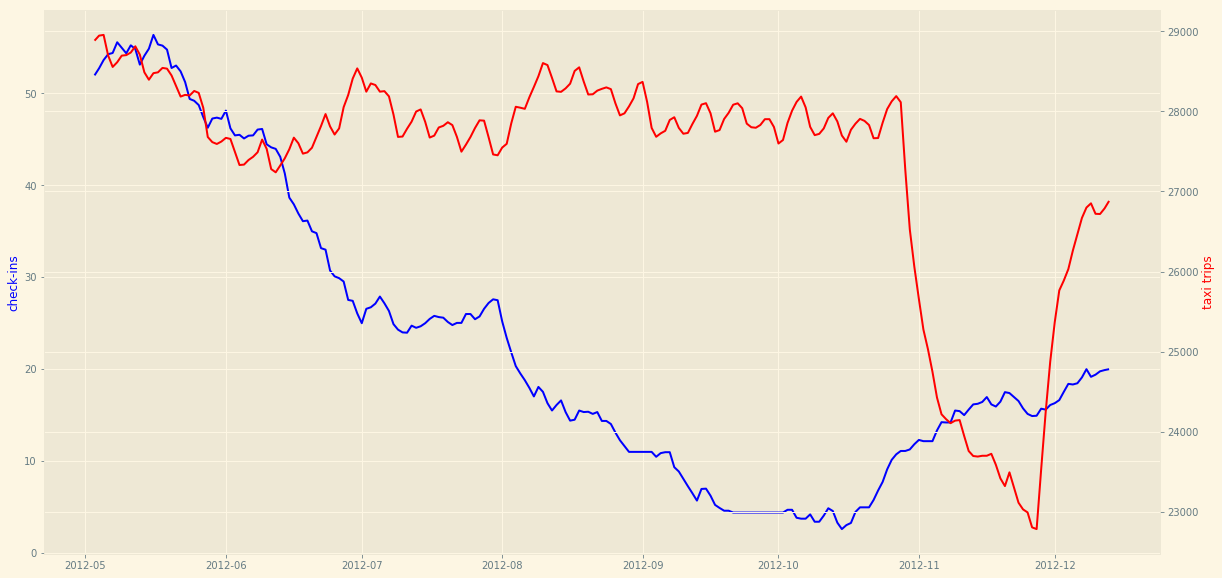

In [100]:
zip_vis = 10001
ck = ts_data[ts_data['zip_code']==zip_vis]['checkin_sum']
tp = ts_data[ts_data['zip_code']==zip_vis]['trip_sum']

# plt.style.use('Solarize_Light2')

fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(ck.rolling(30).mean(),color='b')
ax1.set_ylabel('check-ins', color='b')

ax2 = ax1.twinx()
ax2.plot(tp.rolling(30).mean(),color='r')
ax2.set_ylabel('taxi trips', color='r')



## Library and Data

In [467]:
from sklearn import base
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn_pandas import DataFrameMapper

from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [ ]:
checkin_trip = checkin_trip[(checkin_trip['datetime']>'2012-04-03')&(checkin_trip['datetime']<'2012-12-14')]
checkin_trip['datetime'].min(),checkin_trip['datetime'].max()

In [ ]:
zip_date = pd.get_dummies(data=checkin_trip[['zip_code','month','day']],columns=['zip_code','month','day'])

In [ ]:
y = checkin_trip['checkin_sum']

In [ ]:
X_cat = checkin_trip.drop(['checkin_sum','zip_code','year','month','day','datetime','trip_sum','venus_num'],axis=1)

In [ ]:
X_std = pd.DataFrame(StandardScaler().fit_transform(checkin_trip[['trip_sum','venus_num']]),columns=['trip_sum','venus_num'])

In [ ]:
X = pd.concat([X_cat,X_std,zip_date],axis=1)
# X = pd.concat([X_refined,zip_date],axis=1)

## Linear regression

In [ ]:
ridge = Ridge()

In [ ]:
param_grid = {'alpha':[3650,3750,3850]}

In [ ]:
ridge_gds = GridSearchCV(ridge,param_grid, cv=5,n_jobs = 3,refit=True,verbose=3,scoring = 'neg_mean_squared_error')

In [ ]:
ridge_gds.fit(X_nt,y)


In [ ]:
ridge_gds.best_params_

In [ ]:
linear_estimator = ridge_gds.best_estimator_

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_nt, y, test_size=0.2, random_state=42)
y.shape, X_train.shape, X_test.shape

In [ ]:
checkin_estimator.fit(X_train, y_train)
checkin_estimator.predict(X_test)
checkin_estimator.score(X_test, y_test)

## Random Forest

In [ ]:
y = checkin_trip['checkin_sum']

In [ ]:
X = pd.get_dummies(data=checkin_trip,columns=['zip_code','month','day'])

In [ ]:
X.drop(['checkin_sum','year','datetime'],axis=1,inplace=True)

In [ ]:
X_t = X.drop(columns=X.iloc[:,1:253],axis=1)

In [ ]:
rfr = RandomForestRegressor()

In [ ]:
param_grid = {'n_estimators':[200,300,800],
              'max_depth':[20,50,100],
              'min_samples_leaf':[5,10,100]
             }

In [ ]:
rfr_gds = GridSearchCV(rfr,param_grid, cv=5,n_jobs = 3,refit=True,verbose=3,scoring = 'neg_mean_squared_error')
rfr_gds.fit(X,y)

In [ ]:
rfr_gds.best_params_

In [ ]:
rfr_estimator = rfr_gds.best_estimator_

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size=0.2, random_state=10)
y.shape, X_train.shape, X_test.shape

In [ ]:
rfr.fit(X_train, y_train)
rfr.predict(X_test)
rfr.score(X_test, y_test)

In [ ]:
cross_val_score(rfr, X, y, scoring='neg_mean_squared_error', cv=5)


In [ ]:
dill.dump(rfr_estimator, open('rfr_model.dill', 'wb'))

## Model training pipeline

In [430]:
checkin_trip = pd.read_csv('checkin_trip_0814.csv')
checkin_trip.drop(['Unnamed: 0'],axis=1,inplace=True)

In [432]:
checkin_trip['valid'] = checkin_trip['zip_code'].apply(lambda x: valid_zip(x))

In [433]:
checkin_trip = checkin_trip[checkin_trip['valid']==1] 

In [451]:
len(checkin_trip),sum(checkin_trip['checkin_sum'])

(34454, 141098)

In [448]:
checkin_trip['zip_code'] = checkin_trip['zip_code'].apply(lambda x: recombine_zip(x))

In [452]:
# checkin_trip = checkin_trip.groupby(['zip_code','year','month','day']).sum().reset_index()
checkin_trip.drop(['valid'],axis=1,inplace=True)

In [454]:
weather = pd.read_csv('weather_data.csv')

In [455]:
# wea_data['datetime']=wea_data['time'].apply(lambda x: dt.datetime.utcfromtimestamp(x).strftime('%Y-%m-%d'))
weather['dt']=weather['datetime'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))

In [456]:
weather['year'] = weather['dt'].apply(lambda x:x.year)
weather['month'] = weather['dt'].apply(lambda x:x.month)
weather['day'] = weather['dt'].apply(lambda x:x.day)

In [457]:
weather = weather[['icon','apparentTemperatureHigh','apparentTemperatureLow','cloudCover','humidity','precipProbability',
                     'pressure','visibility','windBearing','windGust','windSpeed','year','month','day']]

In [458]:
checkin_trip = checkin_trip.merge(weather,on=['year','month','day'],how='left')

In [459]:
checkin_trip['year'].describe()

count    34454.0
mean      2012.0
std          0.0
min       2012.0
25%       2012.0
50%       2012.0
75%       2012.0
max       2012.0
Name: year, dtype: float64

In [461]:
checkin_trip.shape

(34454, 269)

**Pipeline fuctions**

In [464]:
## ColumnTransformer
colTrans = make_column_transformer(
        (OneHotEncoder(),['zip_code','year','month','day','icon'])
        ,sparse_threshold=0,remainder="passthrough")

In [ ]:
## Gridsearch for parameter tuning
rfr = RandomForestRegressor()
param_grid = {'n_estimators':[50,100,300],
              'max_depth':[20,50,100],
              'min_samples_leaf':[5,10,100]
             }
rfr_gds = GridSearchCV(rfr,param_grid, cv=5,n_jobs = 3,refit=True,verbose=3,scoring = 'neg_mean_squared_error')

In [465]:
rfr = RandomForestRegressor(n_estimators=300)
## best parameter: {'max_depth': 100, 'min_samples_leaf': 5, 'n_estimators': 300}

In [466]:
## pipeline
rfr_pipe = Pipeline([    
    ('colTrans',colTrans),
    ('randomForest',rfr)
])

**Train Test**

In [472]:
X,y = checkin_trip.drop('checkin_sum',axis=1),checkin_trip['checkin_sum']

In [473]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X.shape, X_train.shape, X_test.shape

((34454, 268), (27563, 268), (6891, 268))

In [469]:
## Time series split
train, test = checkin_trip[checkin_trip['month']<11],checkin_trip[checkin_trip['month']>=11]
X_train, y_train = train.drop('checkin_sum',axis=1),train['checkin_sum']
X_test, y_test = test.drop('checkin_sum',axis=1),test['checkin_sum']
X_train.shape, X_test.shape

((28632, 268), (5822, 268))

In [474]:
rfr_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('colTrans',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0, transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categorical_features=None,
                                                                categories=None,
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                n_values=None,
                                                                sparse=True),
                                                  ['zip_code', 'year', 'month',
                                                   'day', 'ic

In [475]:
rfr_pipe.predict(X_test)
rfr_pipe.score(X_test, y_test)

0.8523925825172174

In [506]:
X.columns

Index(['zip_code', 'year', 'month', 'day', 'trip_sum', 'venus_num',
       'Afghan Restaurant', 'African Restaurant', 'Airport',
       'American Restaurant',
       ...
       'apparentTemperatureHigh', 'apparentTemperatureLow', 'cloudCover',
       'humidity', 'precipProbability', 'pressure', 'visibility',
       'windBearing', 'windGust', 'windSpeed'],
      dtype='object', length=268)

In [505]:
rfr_pipe.named_steps['randomForest'].feature_importances_

array([2.70683216e-05, 1.36054967e-05, 1.16688889e-05, 1.14776695e-04,
       2.98140059e-06, 1.14177723e-06, 4.62321776e-06, 5.04307843e-06,
       2.52784096e-06, 7.35612004e-06, 1.27845312e-05, 9.54416273e-06,
       8.42365202e-06, 1.48753563e-05, 6.19685489e-05, 2.70338884e-05,
       1.43674703e-05, 8.27722275e-06, 1.66881159e-06, 1.91226889e-05,
       1.93046258e-05, 3.69850100e-06, 3.63701775e-06, 1.10126393e-06,
       3.19878728e-06, 4.39247380e-06, 2.97673064e-06, 1.27929678e-06,
       4.15074227e-05, 4.70016519e-06, 5.61734967e-06, 1.22062632e-05,
       3.83994984e-06, 1.81469773e-05, 3.43431143e-07, 6.18013978e-06,
       2.68681470e-06, 2.87621038e-06, 1.42769505e-05, 1.96197296e-05,
       2.30578598e-06, 1.05122216e-06, 1.59834705e-06, 2.50031194e-07,
       2.08210309e-06, 1.27174052e-06, 6.61035484e-07, 5.46490901e-06,
       3.08711807e-06, 2.78295810e-06, 9.83395577e-07, 1.07260251e-06,
       3.34538005e-06, 2.39769135e-06, 4.34910040e-06, 1.30105961e-05,
      

In [480]:
dill.dump(rfr_pipe, open('rfr_pipe.dill', 'wb'))

## Daily prediction pipeline

Load Base data and model

In [730]:
checkin_trip = pd.read_csv('checkin_trip_0828.csv')
checkin_trip.drop('Unnamed: 0',axis=1,inplace=True)
rfr_pipe =dill.load(open('rfr_pipe.dill', 'rb'))

In [734]:
## Load functions
def verify_zip(x,y):
    if x and isinstance(x,int) and len(str(x))==5 and valid_zip(x)==1:
        return x
    elif y:
        try:
            result = point_in_zip(y)
            return result
        except:
            return 'Location out of range!! Model only support certain areas in Manhattan, Brooklyn and Queens!'
        
        
    else:
        return 'Location out of range!! Model only support certain areas in Manhattan, Brooklyn and Queens!'

def get_weather_data(lat,lng):
    key ='3e7fed9d10f93dc0d63701b5ad95da27'
    x = pd.DataFrame()
    unix_now = int((dt.datetime.now()- dt.datetime(1970,1,1)).total_seconds())
    for time in range(unix_now-86400, unix_now+604800, 86400):
        rsp = requests.get('https://api.darksky.net/forecast/{}/{},{},{}'.format(key, lat, lng, time))
        rsp_json = json.loads(rsp.text)
        row = json_normalize(rsp_json["daily"]['data'])
        x = x.append(row,sort=False)
    return x

def update_tripsum(month_list,zipInput):
    tripsum = []
    for item in month_list:
        if item in [4,5,6,7,8,9,10,11,12]:
            tripsum.append(np.mean(checkin_trip[(checkin_trip['zip_code']==zipInput) & 
                                           (checkin_trip['month']==item)]['trip_sum']))
        elif item == 1:
            tripsum.append(np.mean(checkin_trip[(checkin_trip['zip_code']==zipInput) & 
                                           (checkin_trip['month']==12)]['trip_sum']))
        elif item == 2:
            tripsum.append(np.mean(checkin_trip[(checkin_trip['zip_code']==zipInput) & 
                                           (checkin_trip['month']==12)]['trip_sum']))
        elif item == 3:
            tripsum.append(np.mean(checkin_trip[(checkin_trip['zip_code']==zipInput) & 
                                           (checkin_trip['month']==4)]['trip_sum']))
    return tripsum


Input zipcode

In [549]:
## input zipcode
zip_input = 10003

Input lat lng and transfer it to zipcode

In [550]:
## input lat lng
lnglat_input = [-73.990281,40.736213]

In [551]:
zip_input = point_in_zip(lnglat_input)
zip_input

10003

In [751]:
point_in_zip([-1,40.736213])

'Location out of prediction range!'

In [752]:
float()

In [753]:
if y:print('1')
else: print('2')

2


Verify zip

In [552]:
valid_zip(zip_input)

1

In [553]:
zip_input = recombine_zip(zip_input)
zip_input

10003

Input datetime

In [554]:
date_now = dt.datetime.now()

In [555]:
date_pred = [date_now - dt.timedelta(days=1)+dt.timedelta(days=i) for i in range(8)]

In [556]:
month_pred = [item.month for item in date_pred]
month_pred

[8, 8, 8, 8, 8, 9, 9, 9]

In [557]:
day_pred = [item.day for item in date_pred]
day_pred

[27, 28, 29, 30, 31, 1, 2, 3]

input weather data

In [558]:
lat = lnglat_input[1]
lng = lnglat_input[0]

In [311]:
int((dt.datetime.now()- dt.datetime(1970,1,1)).total_seconds())

1566938777

In [489]:
weather_pred = get_weather_data(key,lat,lng)

In [490]:
# weather_pred['year'] = dt.datetime.now().year
# weather_pred['month'] = dt.datetime.now().month
# weather_pred['day'] = dt.datetime.now().day

In [491]:
weather_pred = weather_pred[['icon','apparentTemperatureHigh','apparentTemperatureLow','cloudCover','humidity','precipProbability',
                     'pressure','visibility','windBearing','windGust','windSpeed']].reset_index(drop=True)

In [761]:
'{:.0f}'.format(sum(weather_pred.loc[1][1:3])/2)

'75'

In [772]:
weather_pred.loc[1][0].replace('-',' ')

'rain'

Average the trip sum for test data: day average, keep all vendor density the same

In [548]:
df_test = checkin_trip[checkin_trip['zip_code']==zip_input][0:8].reset_index(drop=True)

In [560]:
df_test['month'] = month_pred
df_test['day'] = day_pred

In [563]:
df_test['trip_sum'] = update_tripsum(month_pred,zip_input)

In [534]:
np.mean(checkin_trip[(checkin_trip['zip_code']==zip_input) & (checkin_trip['month']==9)]['trip_sum'])

21891.666666666668

Merge all prediction data

In [570]:
df_test= pd.concat([df_test,weather_pred],axis=1)

In [577]:
df_test['checkin_pred'] = rfr_pipe.predict(df_test)

### Pipeline

In [735]:
checkin_trip = pd.read_csv('checkin_trip_0828.csv')
checkin_trip.drop('Unnamed: 0',axis=1,inplace=True)
rfr_pipe =dill.load(open('rfr_pipe.dill', 'rb'))

In [736]:
## Variable collection and verification

#frontend input
zip_input = 10003

lnglat_input = [-73.990281,40.736213]
zip_input = point_in_zip(lnglat_input)
verify_zip(zip_input,lnglat_input)

zip_input = recombine_zip(zip_input)

lat = lnglat_input[1]
lng = lnglat_input[0]

#Date and time
date_now = dt.datetime.now()
date_pred = [date_now - dt.timedelta(days=1)+dt.timedelta(days=i) for i in range(8)]
month_pred = [item.month for item in date_pred]
day_pred = [item.day for item in date_pred]


#Weather
weather_pred = get_weather_data(lat,lng)
weather_pred = weather_pred[['icon','apparentTemperatureHigh','apparentTemperatureLow','cloudCover','humidity','precipProbability',
                     'pressure','visibility','windBearing','windGust','windSpeed']].reset_index(drop=True)



In [737]:
## df_test 
df_test = checkin_trip[checkin_trip['zip_code']==zip_input][0:8].reset_index(drop=True)
df_test['month'] = month_pred
df_test['day'] = day_pred
df_test['trip_sum'] = update_tripsum(month_pred,zip_input)
# df_test= pd.concat([df_test,weather_pred],axis=1)
df_test[['icon','apparentTemperatureHigh','apparentTemperatureLow','cloudCover','humidity','precipProbability',
                     'pressure','visibility','windBearing','windGust','windSpeed']] = weather_pred[['icon','apparentTemperatureHigh','apparentTemperatureLow','cloudCover','humidity','precipProbability',
                     'pressure','visibility','windBearing','windGust','windSpeed']]
df_test['checkin_pred'] = rfr_pipe.predict(df_test.drop('checkin_sum',axis=1))


In [796]:
date_pred[0].strftime("%b-%d")

'Aug-27'

# Visualization

## Prediction Viz

In [744]:
pred_data = df_test[['year','month','day','icon','checkin_pred','apparentTemperatureHigh','apparentTemperatureLow']].copy()
pred_data['year'] = date_now.year
pred_data['date'] = pd.to_datetime(pred_data[['year','month', 'day']])
pred_data['apparentTemperature'] = (pred_data['apparentTemperatureHigh'] + pred_data['apparentTemperatureLow'])/2

In [745]:
pred_data

,year,month,day,icon,checkin_pred,apparentTemperatureHigh,apparentTemperatureLow,date,apparentTemperature
0,2019,8,27,partly-cloudy-day,4.200000,74.66,66.82,2019-08-27,70.740
1,2019,8,28,rain,11.016667,83.42,67.49,2019-08-28,75.455
2,2019,8,29,partly-cloudy-day,14.330000,83.20,65.57,2019-08-29,74.385
3,2019,8,30,clear-day,11.046667,87.01,70.40,2019-08-30,78.705
4,2019,8,31,partly-cloudy-day,14.786667,82.68,65.70,2019-08-31,74.190
5,2019,9,1,cloudy,3.350000,79.90,65.80,2019-09-01,72.850
6,2019,9,2,partly-cloudy-day,3.950000,82.11,70.00,2019-09-02,76.055
7,2019,9,3,partly-cloudy-day,3.160000,85.37,73.38,2019-09-03,79.375


In [797]:
step_pred = alt.Chart(pred_data,title="7-day Check-in Prediction").mark_area(
#     color="lightblue",
    interpolate='step',
    line=False,
    
).encode(
    x=alt.X('date:T', axis=alt.Axis(format = ("%m-%d"),title='Date')),
    y=alt.Y('checkin_pred', axis=None),
    tooltip=[alt.Tooltip('date', title='Date'),
             alt.Tooltip('icon', title='Weather'),
             alt.Tooltip('apparentTemperature', title='Apparent Temperature',format='.0f')],
    color=alt.Color('day:N', scale=alt.Scale(scheme='lightmulti'), legend=None)
)
text = step_pred.mark_text(fontSize=18,
    color = 'black',
    align='center',
    baseline='middle',
    dy=-10,
    dx=0  # Nudges text to right so it doesn't appear on top of the bar
).encode(

    text=alt.Text('checkin_pred',format='.1f')
)
pred_plot = alt.layer(step_pred, text).configure_view(
    stroke='transparent'
).configure_title(
    fontSize=25
).configure_axis(
    domainWidth=0.8
).configure_axis(
    titleFontSize=16,
    labelFontSize=12,
    grid=False
)
# step_pred+text

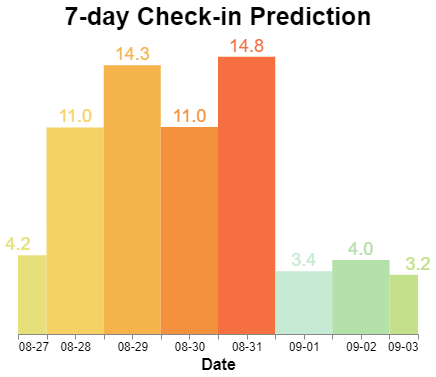

In [798]:
pred_plot

## Historical Data Viz 

In [395]:
m = folium.Map(location=[40.75, -73.90],zoom_start=10)

In [410]:
ctplot_data = pd.DataFrame(checkin_trip.groupby(['zip_code'])['checkin_sum','trip_sum'].mean())

In [411]:
gpd_zip['ZIPCODE'] = gpd_zip['ZIPCODE'].apply(lambda x: int(x))

In [412]:
ctplot_data  = ctplot_data .merge(gpd_zip[['ZIPCODE','geometry']],left_on = 'zip_code',right_on = 'ZIPCODE',how = 'left')

In [413]:
ctplot_data = gpd.GeoDataFrame(ctplot_data)
ctplot_data.crs = {'init':'epsg:4326'}

In [414]:
ctplot_json = ctplot_data.to_json()

In [415]:
m1 = folium.Map(location=[40.75, -73.90],zoom_start=11,width=750, height=500)
# feature_group_b = folium.FeatureGroup(name='Brooklyn_layer')
# feature_group_m = folium.FeatureGroup(name='Mahantta_layer')


folium.Choropleth(geo_data=ctplot_json,
                   data=ctplot_data,
                   columns=['ZIPCODE', 'checkin_sum'],
                   key_on='feature.properties.ZIPCODE',
#                    name='Manhattan,Brooklyn and Queens',
                   name='NYC',
                   fill_color = 'YlOrRd',
                   fill_opacity=0.7,
                   line_opacity=0.2,
                   legend_name='Check-in Density',
                   tooltip=['features.properties.ZIPCODE:Q','features.properties.checkin_num:Q']
                
                   ).add_to(m1)
folium.GeoJson(ctplot_json,
                name='Check-in Info',
                tooltip=folium.features.GeoJsonTooltip(fields=['ZIPCODE','checkin_sum','trip_sum'],
                                                       aliases=['Zipcode:','Daily check-ins','Daily taxi trips']),
                style_function=lambda x:{'color':'#00000000'}).add_to(m1)
# folium.Choropleth(geo_data=weekend_b,
#                    data=aggre_weekend,
#                    columns=['ZIPCODE', 'checkin_sum'],
#                    key_on='feature.properties.ZIPCODE',
#                    name='Brooklyn',
#                    fill_color = 'YlOrRd',
#                    fill_opacity=0.7,
#                    line_opacity=0.2,
#                    legend_name='Check-in Density'
#                    ).add_to(feature_group_b).add_to(m1)

# folium.Choropleth(geo_data=weekend_q,
#                    data=aggre_weekend,
#                    columns=['ZIPCODE', 'checkin_sum'],
#                    key_on='feature.properties.ZIPCODE',
#                    name='Queens',
#                    fill_color = 'YlOrRd',
#                    fill_opacity=0.7,
#                    line_opacity=0.2,
#                    legend_name='Check-in Density'
#                    ).add_to(m1)
# feature_group_m.add_to(m)
# feature_group_b.add_to(m)
folium.LayerControl().add_to(m1)
# folium.features.GeoJsonTooltip(['ZIPCODE']).add_to(m1)

# m1

In [416]:
m1.save("ctplot_nyc.html")
m1.save("ctplot_nyc.json")